# Naan Mudhalvan Assignment 3

## Regression and EDA on Automobile Dataset

The dataset has been dowloaded from Kaggle

In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [69]:
# ignore warnings
import warnings
warnings.filterwarnings('ignore')
# ignore future warnings

### Load the Dataset

In [70]:
df=pd.read_csv("Automobile_data.csv")

In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       205 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

# UNIVARIATE ANALYSIS

In [72]:
df.mean()

symboling               0.834146
wheel-base             98.756585
length                174.049268
width                  65.907805
height                 53.724878
curb-weight          2555.565854
engine-size           126.907317
compression-ratio      10.142537
city-mpg               25.219512
highway-mpg            30.751220
dtype: float64

In [73]:
df.median()

symboling               1.0
wheel-base             97.0
length                173.2
width                  65.5
height                 54.1
curb-weight          2414.0
engine-size           120.0
compression-ratio       9.0
city-mpg               24.0
highway-mpg            30.0
dtype: float64

In [74]:
df.mode()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,0.0,?,toyota,gas,std,four,sedan,fwd,front,94.5,...,92,mpfi,3.62,3.4,9.0,68,5500,31.0,25.0,?
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,122,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [75]:
df.var()

symboling                 1.550789
wheel-base               36.261782
length                  152.208688
width                     4.601900
height                    5.970800
curb-weight          271107.874319
engine-size            1734.113917
compression-ratio        15.777104
city-mpg                 42.799617
highway-mpg              47.423099
dtype: float64

In [76]:
df.std()

symboling              1.245307
wheel-base             6.021776
length                12.337289
width                  2.145204
height                 2.443522
curb-weight          520.680204
engine-size           41.642693
compression-ratio      3.972040
city-mpg               6.542142
highway-mpg            6.886443
dtype: float64

In [77]:
from scipy.stats import skew
median_price = df['price'][df['price'] != '?'].astype(float).median()
df['price'] = df['price'].replace('?', median_price).astype(float)
skewness = skew(df['price'])
print("Skewness : ", skewness)

Skewness :  1.8274812554683892


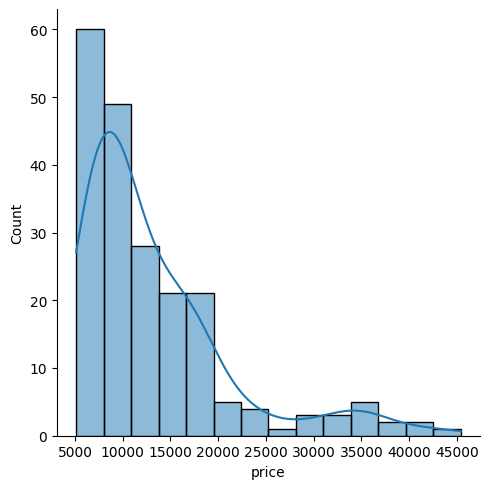

In [78]:
sns.displot(df['price'], kde=True)

3.374863565224175

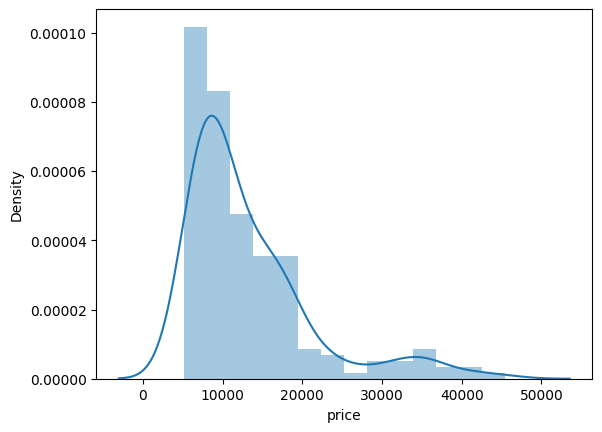

In [79]:
import seaborn as sns
sns.distplot(df['price'], hist=True, kde=True)
df['price'].kurt()

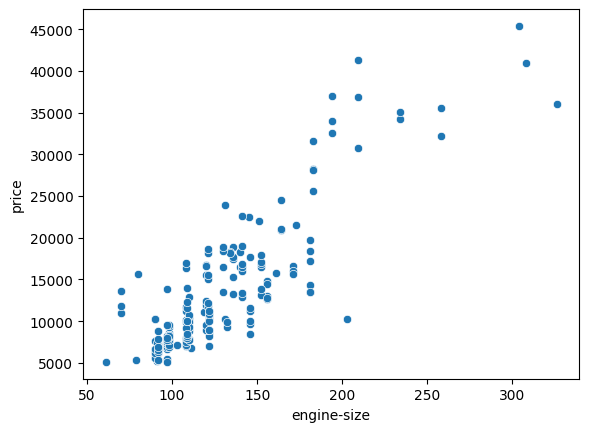

In [80]:
sns.scatterplot(x='engine-size', y='price', data=df)
plt.show()

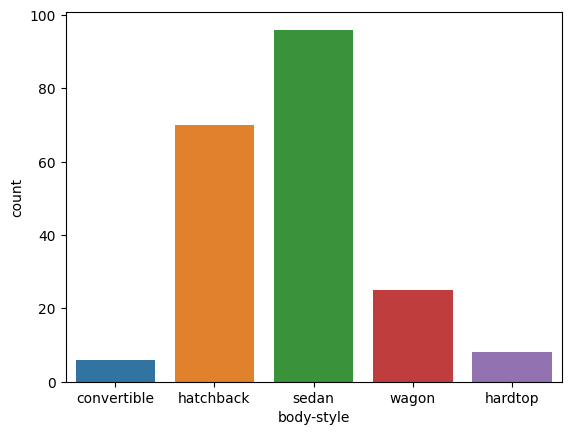

In [81]:
sns.countplot(x='body-style', data=df)
plt.show()

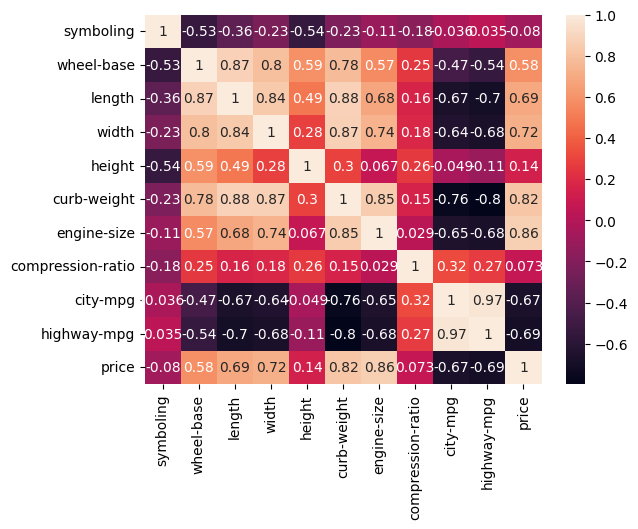

In [82]:
sns.heatmap(df.corr(),annot=True)
plt.show()

<AxesSubplot: >

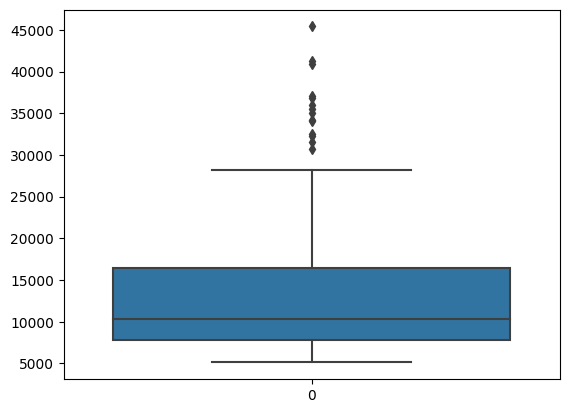

In [83]:
sns.boxplot(df['price'])

In [84]:
df.isnull().sum()

symboling            0
normalized-losses    0
make                 0
fuel-type            0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

# Data Pre Processing

In [85]:
au_da=pd.read_csv("Automobile_data.csv")
numerical_data=au_da.select_dtypes(include=[np.number])
categorical_data=au_da.select_dtypes(exclude=[np.number])
print("Categorical data ",categorical_data.columns)

Categorical data  Index(['normalized-losses', 'make', 'fuel-type', 'aspiration', 'num-of-doors',
       'body-style', 'drive-wheels', 'engine-location', 'engine-type',
       'num-of-cylinders', 'fuel-system', 'bore', 'stroke', 'horsepower',
       'peak-rpm', 'price'],
      dtype='object')


In [86]:
median = au_da['price'][au_da['price'] != '?'].astype(float).median()
au_da['price'] = au_da['price'].replace('?', median).astype(float)

In [87]:
import numpy as np
numerical_data=au_da.select_dtypes(include=[np.number])
categorical_data=au_da.select_dtypes(exclude=[np.number])
print("Categorical data ",categorical_data.columns)
print("Numerical data ",numerical_data.columns)

Categorical data  Index(['normalized-losses', 'make', 'fuel-type', 'aspiration', 'num-of-doors',
       'body-style', 'drive-wheels', 'engine-location', 'engine-type',
       'num-of-cylinders', 'fuel-system', 'bore', 'stroke', 'horsepower',
       'peak-rpm'],
      dtype='object')
Numerical data  Index(['symboling', 'wheel-base', 'length', 'width', 'height', 'curb-weight',
       'engine-size', 'compression-ratio', 'city-mpg', 'highway-mpg', 'price'],
      dtype='object')


In [88]:
from sklearn.preprocessing import LabelEncoder

In [89]:
colns=['normalized-losses', 'make', 'fuel-type', 'aspiration', 'num-of-doors',
       'body-style', 'drive-wheels', 'engine-location', 'engine-type',
       'num-of-cylinders', 'fuel-system', 'bore', 'stroke', 'horsepower',
       'peak-rpm']
lab=LabelEncoder()
for cols in colns:
    au_da[cols]=lab.fit_transform(au_da[cols])
au_da.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,51,0,1,0,2,0,2,0,88.6,...,130,5,23,4,9.0,5,10,21,27,13495.0
1,3,51,0,1,0,2,0,2,0,88.6,...,130,5,23,4,9.0,5,10,21,27,16500.0
2,1,51,0,1,0,2,2,2,0,94.5,...,152,5,1,27,9.0,20,10,19,26,16500.0
3,2,27,1,1,0,1,3,1,0,99.8,...,109,5,13,24,10.0,2,16,24,30,13950.0
4,2,27,1,1,0,1,3,0,0,99.4,...,136,5,13,24,8.0,8,16,18,22,17450.0


In [90]:
encoded=pd.get_dummies(au_da,columns=colns)
encoded

,symboling,wheel-base,length,width,height,curb-weight,engine-size,compression-ratio,city-mpg,highway-mpg,...,peak-rpm_14,peak-rpm_15,peak-rpm_16,peak-rpm_17,peak-rpm_18,peak-rpm_19,peak-rpm_20,peak-rpm_21,peak-rpm_22,peak-rpm_23
0,3,88.6,168.8,64.1,48.8,2548,130,9.0,21,27,...,0,0,0,0,0,0,0,0,0,0
1,3,88.6,168.8,64.1,48.8,2548,130,9.0,21,27,...,0,0,0,0,0,0,0,0,0,0
2,1,94.5,171.2,65.5,52.4,2823,152,9.0,19,26,...,0,0,0,0,0,0,0,0,0,0
3,2,99.8,176.6,66.2,54.3,2337,109,10.0,24,30,...,0,0,1,0,0,0,0,0,0,0
4,2,99.4,176.6,66.4,54.3,2824,136,8.0,18,22,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,109.1,188.8,68.9,55.5,2952,141,9.5,23,28,...,0,1,0,0,0,0,0,0,0,0
201,-1,109.1,188.8,68.8,55.5,3049,141,8.7,19,25,...,1,0,0,0,0,0,0,0,0,0
202,-1,109.1,188.8,68.9,55.5,3012,173,8.8,18,23,...,0,0,1,0,0,0,0,0,0,0
203,-1,109.1,188.8,68.9,55.5,3217,145,23.0,26,27,...,0,0,0,0,0,0,0,0,0,0


In [91]:
from sklearn.preprocessing import StandardScaler
scaling = ['wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-size', 'bore', 'stroke','compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg']
scaler = StandardScaler()
au_da[scaling] = scaler.fit_transform(au_da[scaling])

In [92]:
au_da.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,51,0,1,0,2,0,2,0,-1.690772,...,0.074449,5,0.450862,-1.751829,-0.288349,-1.442542,-0.302478,-0.646553,-0.546059,13495.0
1,3,51,0,1,0,2,0,2,0,-1.690772,...,0.074449,5,0.450862,-1.751829,-0.288349,-1.442542,-0.302478,-0.646553,-0.546059,16500.0
2,1,51,0,1,0,2,2,2,0,-0.708596,...,0.604046,5,-1.676114,0.839098,-0.288349,-0.632939,-0.302478,-0.953012,-0.691627,16500.0
3,2,27,1,1,0,1,3,1,0,0.173698,...,-0.431076,5,-0.515945,0.501151,-0.035973,-1.604463,0.828366,-0.186865,-0.109354,13950.0
4,2,27,1,1,0,1,3,0,0,0.107110,...,0.218885,5,-0.515945,0.501151,-0.540725,-1.280621,0.828366,-1.106241,-1.273900,17450.0


In [93]:
correlation = au_da[scaling].corr()
print(correlation)

                   wheel-base    length     width    height  curb-weight  \
wheel-base           1.000000  0.874587  0.795144  0.589435     0.776386   
length               0.874587  1.000000  0.841118  0.491029     0.877728   
width                0.795144  0.841118  1.000000  0.279210     0.867032   
height               0.589435  0.491029  0.279210  1.000000     0.295572   
curb-weight          0.776386  0.877728  0.867032  0.295572     1.000000   
engine-size          0.569329  0.683360  0.735433  0.067149     0.850594   
bore                 0.452844  0.578781  0.529816  0.114652     0.618645   
stroke               0.165400  0.126641  0.189305 -0.086952     0.146510   
compression-ratio    0.249786  0.158414  0.181129  0.261214     0.151362   
horsepower          -0.102264 -0.237802 -0.243428  0.143007    -0.305914   
peak-rpm            -0.364569 -0.277979 -0.206980 -0.323686    -0.270384   
city-mpg            -0.470414 -0.670909 -0.642704 -0.048640    -0.757414   
highway-mpg 

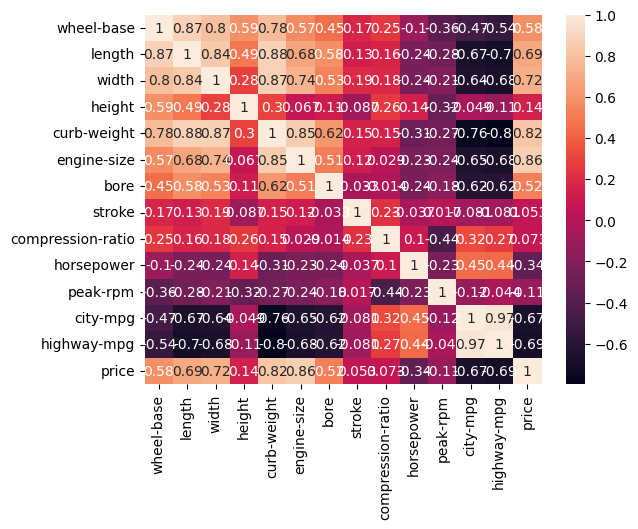

In [94]:
s= ['wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-size', 'bore', 'stroke','compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg','price']
sns.heatmap(au_da[s].corr(),annot=True)
plt.show()

In [95]:
au_da.describe()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,2.050000e+02,...,2.050000e+02,205.000000,2.050000e+02,2.050000e+02,2.050000e+02,2.050000e+02,2.050000e+02,2.050000e+02,2.050000e+02,205.000000
mean,0.834146,29.853659,12.195122,0.902439,0.180488,1.424390,2.614634,1.326829,0.014634,-1.291108e-15,...,3.466062e-17,3.253659,5.199093e-17,3.466062e-17,-3.639365e-16,8.665155e-18,-1.559728e-16,1.104807e-16,1.473076e-16,13150.307317
std,1.245307,17.197470,6.274831,0.297446,0.385535,0.514867,0.859081,0.556171,0.120377,1.002448e+00,...,1.002448e+00,2.013204,1.002448e+00,1.002448e+00,1.002448e+00,1.002448e+00,1.002448e+00,1.002448e+00,1.002448e+00,7879.121326
min,-2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-2.023713e+00,...,-1.586561e+00,0.000000,-1.772795e+00,-2.202425e+00,-7.931011e-01,-1.712410e+00,-2.187218e+00,-1.872388e+00,-2.147310e+00,5118.000000
25%,0.000000,15.000000,8.000000,1.000000,0.000000,1.000000,2.000000,1.000000,0.000000,-7.085959e-01,...,-7.199469e-01,1.000000,-7.093066e-01,-7.379883e-01,-3.892993e-01,-1.064727e+00,-6.794260e-01,-9.530117e-01,-8.371954e-01,7788.000000
50%,1.000000,28.000000,12.000000,1.000000,0.000000,1.000000,3.000000,1.000000,0.000000,-2.924196e-01,...,-1.662771e-01,5.000000,-2.259028e-01,1.632037e-01,-2.883489e-01,4.465324e-01,7.447024e-02,-1.868650e-01,-1.093538e-01,10295.000000
75%,2.000000,48.000000,19.000000,1.000000,0.000000,2.000000,3.000000,2.000000,0.000000,6.065210e-01,...,3.392475e-01,5.000000,9.342662e-01,6.137996e-01,-1.873985e-01,8.243473e-01,8.283665e-01,7.325109e-01,4.729195e-01,16500.000000
max,3.000000,51.000000,21.000000,1.000000,1.000000,2.000000,4.000000,2.000000,1.000000,3.686225e+00,...,4.792679e+00,7.000000,1.901074e+00,1.852939e+00,3.244916e+00,1.472030e+00,2.147685e+00,3.643868e+00,3.384286e+00,45400.000000


# Build ML Model

In [96]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score
X = au_da.drop('price',axis=1)
y = au_da['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Evaluating the ML Model

In [97]:
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)
score= r2_score(y_test, y_pred)
print("R2 Score:", score)

Mean Squared Error: 13322714.538212087
R2 Score: 0.8301614578799035
